## 🚀 Python Lab: Convolutional Neural Networks (CNNs) for CIFAR-10 (TensorFlow/Keras Version)
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 9 - May 25, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week09/02_CNN_CIFAR_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week09/02_CNN_CIFAR_Keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
gpus = tf.config.list_physical_devices('GPU')
print("GPU name:", gpus)
print("Num GPUs Available:", len(gpus))

GPU name: []
Num GPUs Available: 0


## 1️⃣ Load and Preprocess CIFAR-10 Dataset
- A data set of 32x32 color images
- Categorized into one of ten classifications

In [7]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print dataset shapes
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Example label (one-hot): {y_test[0]}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Example label (one-hot): [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Visualize Sample Images

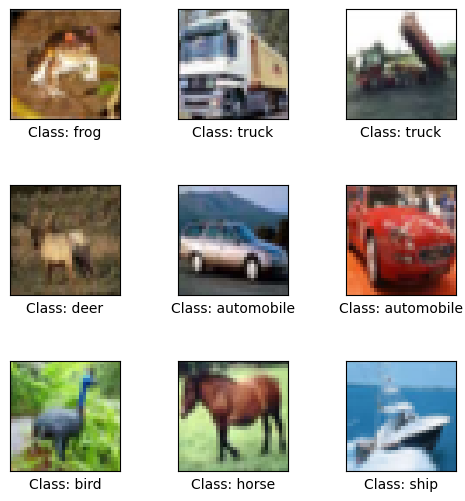

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_xlabel(f"Class: {class_names[np.argmax(y_train[i])]}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## 2️⃣ Define CNN Model

In [11]:
def create_cifar_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),  # Fixed: use Input layer
        
        # First convolutional block
        Conv2D(32, (4, 4), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Second convolutional block
        Conv2D(32, (4, 4), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten and dense layers
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Create and compile model (no decay)
model = create_cifar_model(input_shape=x_train.shape[1:])
model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

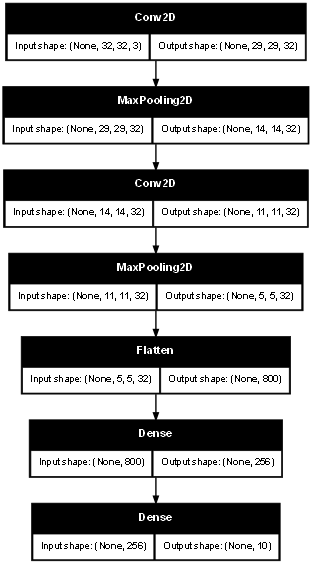

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=50)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

## 3️⃣ Train the Model

In [15]:
%%time

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.2618 - loss: 2.0337 - val_accuracy: 0.4104 - val_loss: 1.6624
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.4230 - loss: 1.6223 - val_accuracy: 0.4443 - val_loss: 1.5725
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4697 - loss: 1.4879 - val_accuracy: 0.4704 - val_loss: 1.4718
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 30ms/step - accuracy: 0.5060 - loss: 1.4016 - val_accuracy: 0.5148 - val_loss: 1.3769
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.5318 - loss: 1.3401 - val_accuracy: 0.5300 - val_loss: 1.3176
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.5474 - loss: 1.2943 - val_accuracy: 0.5466 - val_loss: 1.2861
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 23ms/step - accuracy: 0.5677 - loss: 1.2425 - val_accuracy: 0.5487 - val_loss: 1.2743
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.5789 -

## 4️⃣ Evaluate the Model

In [17]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6036 - loss: 1.1374
Test loss: 1.14290189743042
Test accuracy: 0.6025000214576721


> **TODO:** Fill the Table

The table below tracks model performance. Update it with results from different configurations (e.g., batch sizes).

| Model # | Num of Trainable Params | Batch Size | Test Accuracy (10 Epochs) | Elapsed Time (s) |
|---------|-------------------------|------------|--------------------------|------------------|
| 1       | 225,610                 | 64         | 60.15%                   | 171              |
| 2       | 225,610                 | 256        | TBD                      | TBD              |
| 3       | 225,610                 | 1          | TBD                      | TBD              |

**Note:** Replace `TBD` with actual values after running experiments with different batch sizes.

## 5️⃣ Visualize Training History

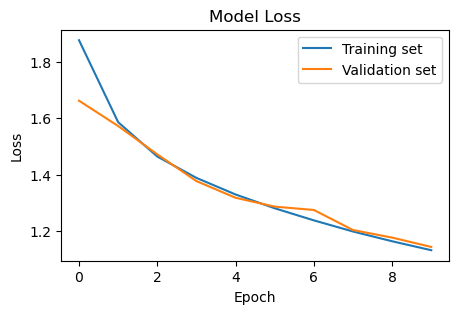

In [20]:
plt.figure(figsize=(5, 3))
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training set')
plt.plot(history.history['val_loss'], label='Validation set')
plt.legend()
plt.savefig('02_CNN_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

> **TODO:** Add validation history to the plots

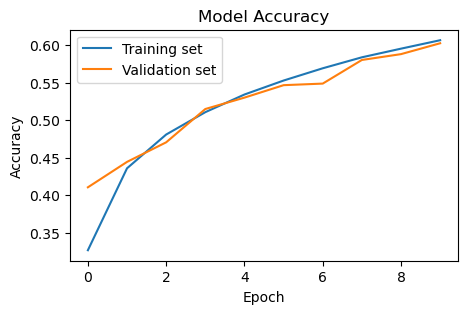

In [22]:
plt.figure(figsize=(5, 3))
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training set')
plt.plot(history.history['val_accuracy'], label='Validation set')
plt.legend()
plt.savefig('02_CNN_acc.pdf', format='pdf', bbox_inches='tight')
plt.show()

## 6️⃣ Visualize Misclassifications

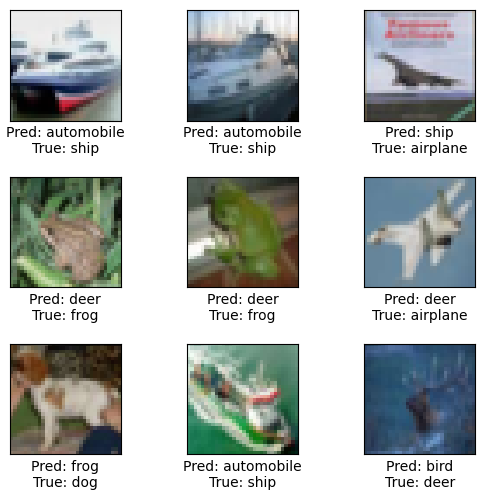

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.6)

cont = 0
for ax in axes.flat:
    while cont < len(x_test):
        test_image = x_test[cont]
        predicted_label = model.predict(np.array([test_image]), verbose=0).argmax()
        true_label = y_test[cont].argmax()
        if predicted_label != true_label:
            ax.imshow(test_image)
            ax.set_xlabel(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")
            ax.set_xticks([])
            ax.set_yticks([])
            cont += 1
            break
        cont += 1

plt.show()

## 7️⃣ Confusion Matrix

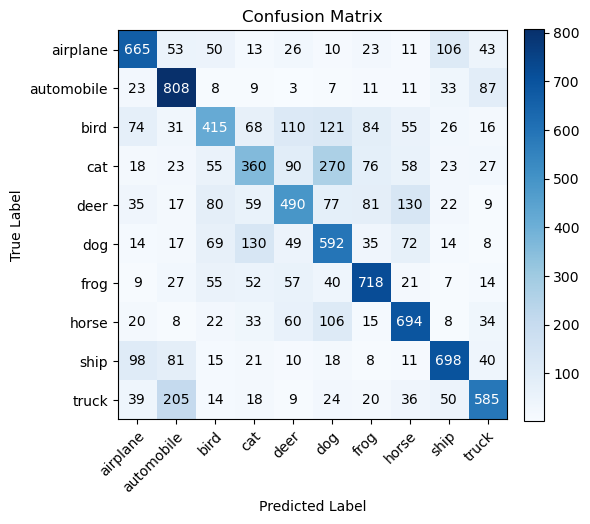

In [26]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None):
    if not title:
        title = 'Normalized Confusion Matrix' if normalize else 'Confusion Matrix'
    
    # Compute confusion matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Label',
           xlabel='Predicted Label')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    return ax

# Generate predictions
y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred, class_names, title='Confusion Matrix')
# plot_confusion_matrix(y_test, y_pred, class_names, normalize=True, title='Normalized Confusion Matrix')
plt.show()

## 8️⃣ Classification Report

In [28]:
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.67      0.67      0.67      1000
  automobile       0.64      0.81      0.71      1000
        bird       0.53      0.41      0.47      1000
         cat       0.47      0.36      0.41      1000
        deer       0.54      0.49      0.51      1000
         dog       0.47      0.59      0.52      1000
        frog       0.67      0.72      0.69      1000
       horse       0.63      0.69      0.66      1000
        ship       0.71      0.70      0.70      1000
       truck       0.68      0.58      0.63      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



## 9️⃣ Save the Model

In [30]:
# model.save('cifar_10epochs.h5')

## 🔢 Adaptation for MNIST (Handwritten Digits)
### Load and Preprocess MNIST Dataset

In [46]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Reshape and normalize (MNIST is grayscale, so add channel dimension)
x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, 10)

# Print dataset shapes
print(f"MNIST Training data shape: {x_train_mnist.shape}")
print(f"MNIST Test data shape: {x_test_mnist.shape}")

MNIST Training data shape: (60000, 28, 28, 1)
MNIST Test data shape: (10000, 28, 28, 1)


### Define and Train MNIST Model

In [ ]:
def create_mnist_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Create and compile MNIST model
mnist_model = create_mnist_model(input_shape=(28, 28, 1))
mnist_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
mnist_history = mnist_model.fit(x_train_mnist, y_train_mnist,
                                batch_size=32,
                                epochs=10,
                                validation_data=(x_test_mnist, y_test_mnist),
                                shuffle=True)

# Evaluate the model
mnist_scores = mnist_model.evaluate(x_test_mnist, y_test_mnist, verbose=1)
print(f"MNIST Test loss: {mnist_scores[0]:.4f}")
print(f"MNIST Test accuracy: {mnist_scores[1]:.4f}")

### Visualize MNIST Training History

In [ ]:
plot_training_history(mnist_history)

### MNIST Confusion Matrix and Classification Report

In [ ]:
# Generate predictions for MNIST
y_pred_mnist = np.argmax(mnist_model.predict(x_test_mnist, verbose=0), axis=1)
mnist_class_names = [str(i) for i in range(10)]

# Plot confusion matrices
plot_confusion_matrix(y_test_mnist, y_pred_mnist, mnist_class_names, title='MNIST Confusion Matrix')
plot_confusion_matrix(y_test_mnist, y_pred_mnist, mnist_class_names, normalize=True, title='MNIST Normalized Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(np.argmax(y_test_mnist, axis=1), y_pred_mnist, target_names=mnist_class_names))

## 🧪 Experiment with Network Structures
> **TODO:** 4-Layer CNN for CIFAR-10

In [ ]:
def create_4layer_cifar_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model